# Dependencies and Data

##  Import Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Import Data

In [9]:
df = pd.read_csv("data.csv")
df.head(10)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
5,E Tutto Qua,270 Columbus Ave,"San Francisco, CA 94133-4518","Seafood, Italian, Pizza",4.5 of 5 bubbles,"1,406 reviews",NaN,+1 415-989-1002,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
6,Black Angus Steakhouse - Federal Way,2400 S 320th St,"Federal Way, WA 98003-5465","American, Steakhouse, Bar",4 of 5 bubbles,220 reviews,This is an easy any time place to have dinner!...,+1 253-839-8370,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
7,Ziziki's,11663 Preston Rd,"Dallas, TX 75230-2704","Mediterranean, Greek, Healthy",4.5 of 5 bubbles,89 reviews,My husband and I went to Greece last fall and ...,+1 469-232-9922,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
8,Vince's Italian Restaurant & Pizzeria,2815 NE Sunset Blvd,"Renton, WA 98056-3105","Italian, Pizza, Vegetarian Friendly",4 of 5 bubbles,90 reviews,I love Vince's pizza and I was in the neighbor...,+1 425-226-8180,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4 of 5 bubbles,258 reviews,"The ambience, food and service were all excell...",+1 607-273-3464,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$$$


In [10]:
### Looking at all the column names from the dataset
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

We dont need **contact number, menu url** and **trip advisor url** for EDA or predictive modeling so let us remove it 

In [11]:
### Dropping columns which are not required, axis = 1 - indicates column-wise drop  
df = df.drop(['Contact Number', 'Trip_advisor Url',
       'Menu'],axis=1)

# Cleaning the Dataset

## Checking for missing values

In [12]:
### Total number of missing Values per columns
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type               13
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

Comments and Type have visible missing values. Lets check for other subtle such values

In [13]:
### Checking reviews and No of reviews
print(df.Reviews.unique())
display(df[df.Reviews=='No review'])

display(df[df['No of Reviews']=='Undefined Number'])

['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


We can get rid of these two rows safely since we have no other information

In [14]:
### Dropping Rows which are not required and reset index
df = df.drop([1744,2866])
df = df.reset_index(drop=True)
df

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$
3056,City Vineyard,233 West Street,"New York City, NY 10013","American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801","Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336","American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$


In [15]:
### Impute NAN's with empty strings
df.Comments = df.Comments.fillna('')

In [16]:
### Impute Type with Mode
df.Type = df.Type.fillna(df.Type.value_counts().index[0])

In [17]:
df.isnull().sum()

Name              0
Street Address    0
Location          0
Type              0
Reviews           0
No of Reviews     0
Comments          0
Price_Range       0
dtype: int64

# Exploratory Data Analysis
Lets gain some insights about our data

## A. 10 Most Common Types of Cuisines 

In [18]:
### Creating a list of all possible cuisines per restaurants (Multiple instances to later see popularity)
types = []
for i in range(len(df)):
    if type(df.Type[i]) == str:
        types.append(df.Type[i].split(",")) 
flat_list = list(itertools.chain(*types))
series = pd.Series(flat_list)

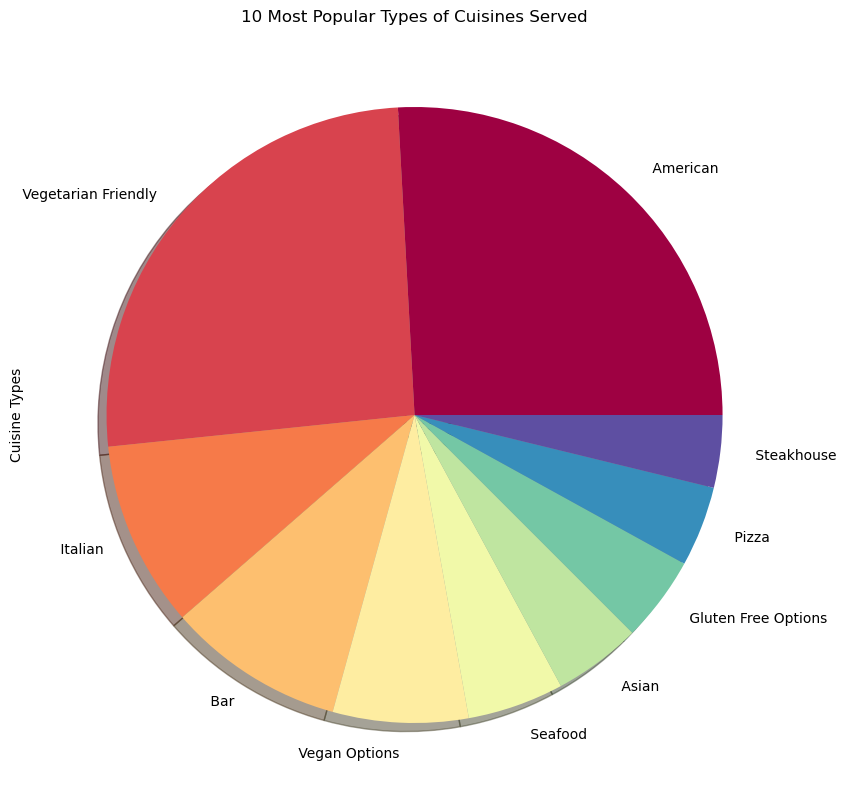

In [19]:
### Pandas Plot
ax = pd.Series(series).value_counts()[:10].plot(kind='pie', shadow=True,  cmap=plt.get_cmap('Spectral'), figsize=(10,10))
ax.set_ylabel('Cuisine Types')
plot = ax.set_title("10 Most Popular Types of Cuisines Served")

## B. Which state has the Most Number of Restaurants?

In [20]:
### Seperating State, City and Zip Code from Location Column
df['State'] = [i.split(",")[-1].split(" ")[1] for i in df.Location]
df['ZipCode'] = [i.split(",")[-1].split(" ")[-1] for i in df.Location]
df['City'] = [",".join(i.split(",")[:-1]) for i in df.Location]
df = df.drop(['Location'],axis=1)
df

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse
...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood


In [21]:
df = df.drop(df[df.State==''].index[0])
df.State.value_counts()

NY    650
CA    615
TX    614
WA    606
NJ    563
PA      9
OR      2
Name: State, dtype: int64

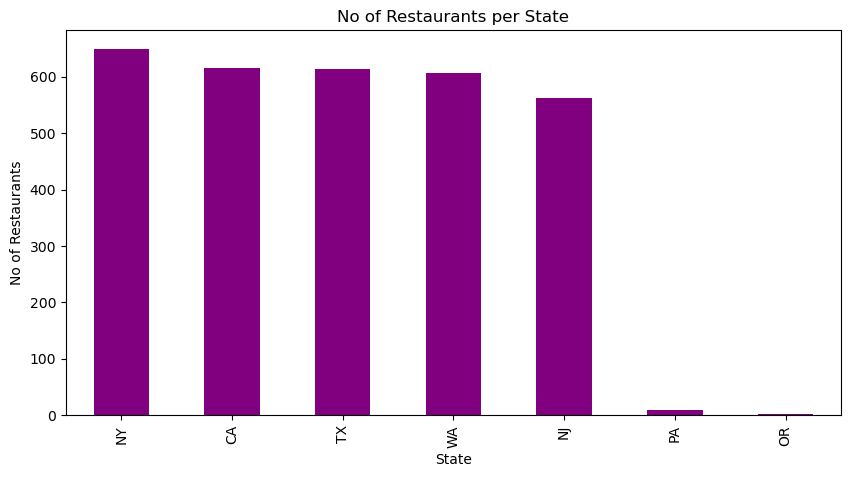

In [22]:
ax = df.State.value_counts().plot(kind="bar", color="Purple",  figsize=(10,5))

ax.set_ylabel('No of Restaurants')
ax.set_xlabel('State')
plot = ax.set_title("No of Restaurants per State")

In [23]:
pd.DataFrame({'No of Restuarants per State':df.State.value_counts()}).head(10)

,No of Restuarants per State
NY,650
CA,615
TX,614
WA,606
NJ,563
PA,9
OR,2


Most Number of Restaurants are in **New York** followed by **California**

## C.  Ranking the best (most highly rated) restaurants from each state

#### Now most highly rated restaurant has to include two factors: -
- Number of people who reviewed
- Review Ratings on 5



In [24]:
### Converting the string values to float/int values
df['Reviews'] = [float(i.split(" ")[0]) for i in df.Reviews]
df['No of Reviews'] = [int(i.split(" ")[0].replace(",","")) for i in df['No of Reviews']]

In [25]:
### Weighted Ratings - No of Reviewers * Average Ratings
df['weighted_ratings'] = df.Reviews*df['No of Reviews']

In [27]:
df.weighted_ratings

0       1093.5
1        336.0
2       1024.0
3       1057.5
4       1140.0
         ...  
3055     891.0
3056    1683.0
3057     844.0
3058     348.0
3059     823.5
Name: weighted_ratings, Length: 3059, dtype: float64

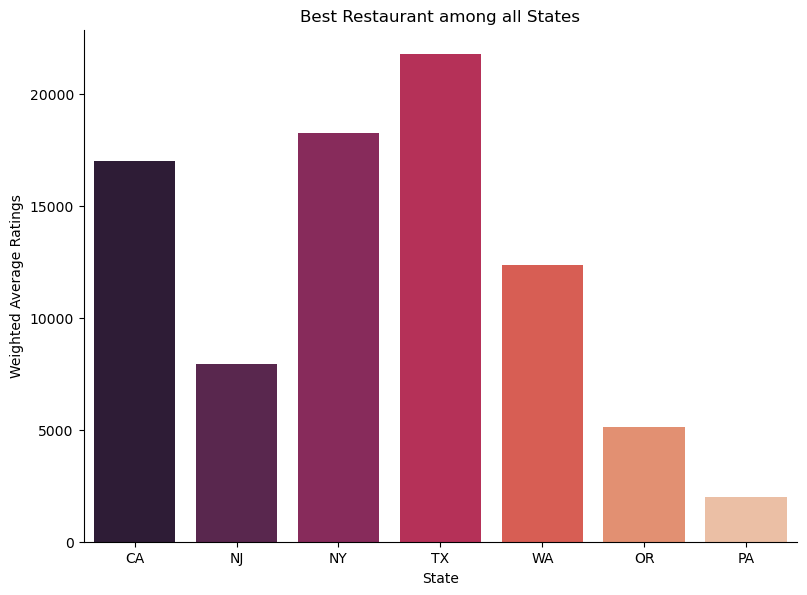

In [28]:
labels = df.State.unique().flatten()
average_vote_share_list = [df[df.State==i].weighted_ratings.max() for i in labels]
avg_wt_ratings = pd.DataFrame({'State':labels, 'Weighted Average Ratings': average_vote_share_list})
plot = sns.catplot(x='State', y="Weighted Average Ratings", kind="bar", data=avg_wt_ratings, palette="rocket")
plt.title("Best Restaurant among all States")
plt.gcf().set_size_inches(9, 6)

# Building a Recommender System

In [29]:
####  This my Main Feature  - Comments
df.Comments

0                                                        
1       Both times we were there very late, after 11 P...
2       Waitress was very friendly but a little pricey...
3       Not sure why I went there for the second time....
4       Doesn't look like much from the outside but wa...
                              ...                        
3055    We had to wait a few minutes to get it but it ...
3056    Came here to see Andrea Gibson perform, we wer...
3057    We come to Brio once a month. They are good fo...
3058    Stopped in yesterday for Breakfast. When in Je...
3059    First time for dinner. 2 couples. Delicious mu...
Name: Comments, Length: 3059, dtype: object

In [30]:
### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Comments)

### Output Shape of tf-idf matrix
tfidf_matrix.shape





(3059, 6241)

In [31]:
#### Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
### Construct a reverse map of indices and restaurant names
indices = pd.Series(df.index, index=df.Name).drop_duplicates()
indices

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3059, dtype: int64

In [41]:
### Function that gives us the most similar restaurants
def get_recommendations(name, cosine_sim=cosine_sim):
    
    ### Index of the restaurant which matches the name
    idx = indices[name]
    
    ### Getting the pairwise similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    ### Sorting the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    ### Getting the similarity scores of the 10 Most similar restuarants
    sim_scores = sim_scores[1:11]
    
    ### Getting the restaurant inidices
    restaurant_indices = [i[0] for i in sim_scores]
    
    ### Returning the Top 10 most similar restaurants
    return df['Name'].iloc[restaurant_indices]

In [43]:
get_recommendations('Coach House Diner')

281                          Bean's & Lager
1917                Pappas Bros. Steakhouse
1186                              Bistro 18
2340              The Blue fish Las Colinas
998                   The Fork at Agate Bay
1896                  Mediterranean Kitchen
2737    Kitchen Table Cafe- Evergreen Place
2351                           Square Lotus
2276                      Dark Horse Tavern
597                              Noah's Ark
Name: Name, dtype: object

These are 10 Most Similar Restaurants based on Comments

In [63]:

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')  
df['Reviews'] = df['Reviews'].fillna(0)  

# Sorting the DataFrame by Reviews column in descending order
sorted_df = df.sort_values(by='Reviews', ascending=False)

# Displaying the top-rated restaurants
top_restaurants = sorted_df[['Name', 'Reviews']]
print("Top-rated restaurants:")
print(top_restaurants.head())

Top-rated restaurants:
                                      Name  Reviews
1233                          Thai Kitchen      5.0
1817  Diana of Little Chef, Little Kitchen      5.0
1813                          Nelsons Cafe      5.0
1811             SwitcHouse Plates & Pours      5.0
1631                The Kitchen Restaurant      5.0


In [64]:


# Filtering restaurants with more than 150 reviews and more than 4 rating review.
popular_restaurants = df[(df['No of Reviews'] > 150) & (df['Reviews'] > 4.0)]

# Excluding entries with no reviews
popular_restaurants_with_reviews = popular_restaurants[popular_restaurants['Reviews'] != 'No review available']


# Sorting restaurants by rating and number of reviews in descending order
recommended_restaurants = popular_restaurants_with_reviews.sort_values(by=['Reviews', 'No of Reviews'], ascending=[False, False])

# Displaying the top recommended restaurants
print(recommended_restaurants[['Reviews', 'No of Reviews', 'Name']])


      Reviews  No of Reviews                           Name
1669      5.0            520      Baci di Firenze Trattoria
1635      5.0            434  Sam's Italian Deli and Market
2619      5.0            300                    Swan Market
136       5.0            262                     Ambrogio15
1631      5.0            251         The Kitchen Restaurant
...       ...            ...                            ...
2885      4.5            154     Sunrise Cafe of Ocean City
852       4.5            153      Aloy's Italian Restaurant
1852      4.5            153             Amarone Ristorante
2630      4.5            152         Barry's Do-Me-A-Flavor
182       4.5            151           Antonello Ristorante

[1223 rows x 3 columns]


In [66]:
## Using collaborative filtering based on user

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split


# Creating a user ID column
df['UserID'] = df['Name'].astype('category').cat.codes

# Loading data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserID', 'Name', 'Reviews']], reader)

# Splitting the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Using user-based collaborative filtering with k-NN
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Get recommendations for a user 
user_id_to_recommend = 1

# Get the items that the user has already rated
user_items = df[df['UserID'] == user_id_to_recommend]['Name']

# Get the items to predict (items not rated by the user)
items_to_predict = [item for item in df['Name'].unique() if item not in user_items]

# Predicting ratings for items not rated by the user
predictions = [(user_id_to_recommend, item, df[df['Name'] == item]['Reviews'].values[0], df[df['Name'] == item]['No of Reviews'].values[0])
                for item in items_to_predict]

# Filtering predictions based on reviews rating >= 4 and more than 100 reviews
filtered_predictions = [(user, item, reviews, no_of_reviews)
                        for user, item, reviews, no_of_reviews in predictions
                        if float(reviews) >= 4.0
                        and no_of_reviews > 100]


# Displaying the top 10 recommended restaurants with reviews rating >= 4 and more than 100 reviews
recommended_restaurants = pd.DataFrame(filtered_predictions, columns=['UserID', 'Name', 'Reviews', 'No of Reviews']).head(10) 


print("Top 10 recommended restaurants :")
print(recommended_restaurants[['Name', 'Reviews', 'No of Reviews']])


Computing the cosine similarity matrix...
Done computing similarity matrix.
Top 10 recommended restaurants :
                                   Name  Reviews  No of Reviews
0         Betty Lou's Seafood and Grill      4.5            243
1                      Table Talk Diner      4.0            256
2                           Sixty Vines      4.5            235
3                          The Clam Bar      4.0            285
4                           E Tutto Qua      4.5           1406
5  Black Angus Steakhouse - Federal Way      4.0            220
6                John Thomas Steakhouse      4.0            258
7                         ZaZa's Cucina      4.0            271
8    Wilde Rover Irish Pub & Restaurant      4.0            118
9                  New World Bistro Bar      4.5            706
